In [247]:
from lightkurve import KeplerLightCurveFile
from george import kernels
from george.metrics import Metric
import matplotlib.pyplot as plt
import numpy as np
import george
from astropy.stats import median_absolute_deviation

str = KeplerLightCurveFile.from_archive(210408563)
strPDC = str.PDCSAP_FLUX.remove_outliers()

Found 1 File(s)
INFO: Found cached file ./mastDownload/K2/ktwo210408563-c04_lc/ktwo210408563-c04_llc.fits with expected size 377280. [astroquery.query]


/anaconda/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:165: RuntimeWarning: invalid value encountered in greater
  _filtered_data.mask |= _filtered_data > max_value
/anaconda/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:166: RuntimeWarning: invalid value encountered in less
  _filtered_data.mask |= _filtered_data < min_value


In [248]:
from scipy.optimize import minimize 
def neg_ln_like(p): # set parameters vectors and return the likelihood
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(y)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(y)

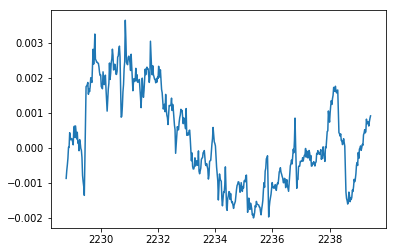

In [249]:

y = strPDC.flux[:500]
x = strPDC.time[:500]
y = (y/np.median(y)) - 1
x = x[np.isfinite(y)]
y = y[np.isfinite(y)]


plt.plot(x,y)

In [268]:
kernel = np.var(y) * kernels.ExpSquaredKernel(1) * kernels.CosineKernel(log_period = 0.5)
gp = george.GP(kernel)
gp.compute(x,y)
print(yerr.size)
print(x.size)
xpred = x
predVar = gp.predict(y,xpred, return_var = True)

1000
500


In [269]:
result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
print(result)
gp.set_parameter_vector(result.x)
pred = gp.predict(y, xpred, return_var = True)

      fun: -2959.650921884208
 hess_inv: array([[ 4.61714581e-02,  5.06644618e-03,  2.91520691e+00],
       [ 5.06644618e-03,  7.11077412e-02, -1.49044857e+03],
       [ 2.91520691e+00, -1.49044857e+03,  1.16435287e+08]])
      jac: array([ 7.04143212e-07, -3.19763046e-06, -7.73516349e-10])
  message: 'Optimization terminated successfully.'
     nfev: 49
      nit: 43
     njev: 49
   status: 0
  success: True
        x: array([-14.06466711,  -3.24892225,   6.43287484])


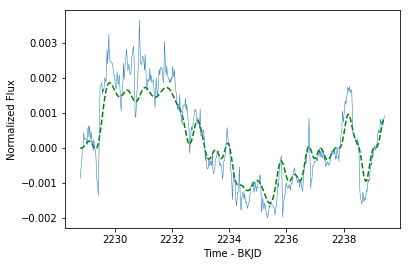

In [270]:
pred, pred_var = gp.predict(y, xpred, return_var = True)

#print(xpred.size)
#print(pred.size)
#print(x.size)
#print(y.size)

plt.plot(xpred,pred, "--g")
plt.xlabel('Time - BKJD')
plt.ylabel('Normalized Flux')
plt.plot(x,y, lw=0.5)

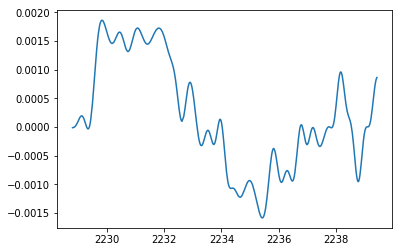

In [271]:
plt.plot(xpred,pred) # the predicted fit